In [1]:
#imports pandas and shorten the name
import pandas as pd

#import numpy so you can use arrays and get random numbers and shorten the name
import numpy as np

#import matplotlib.pyplot so you can make plots and charts and shorten the name
import matplotlib.pyplot as plt

#import requests so you can make API calls
import requests

#import time so you can use dates and timepoints
import time


#import json so python can make sense of the data from the API call
import json

#import the ability to do linear regressions from the scipy.stats package
from scipy.stats import linregress

#import the API key for OpenWeather from the config file
from resource import api_key

#import the ability to find the nearest city to a set of coordinates 
#link is pip install citipy
from citipy import citipy




In [2]:
#create output file to use later
output_data_file = "output_data/cities.csv"

Generate Cities List

In [3]:
# make the range of latitudes that encompasses the whole world
lat_range = (-90,90)

#make the range of longitudes that emcompasses the whole world
long_range = (-180,180)


In [4]:
#create an empty list to hold the latitudes and longitudes
lat_longs = []

#create an empty list to hold the city names
cities =[]



In [5]:
#explain what's going to go in the lat_long list
#first, generate the random latitudes using numpy/np
#get random numbers for -90 to 90 deg latitude, getting 1,500 to be sure that there will be 500 to work with
#put them in a list and keep adding rows until you get 1,500 rows
lat = np.random.uniform(lat_range[0], lat_range[1], size=1500)

#do the same for longitudes
long = np.random.uniform(lat_range[0], lat_range[1], size = 1500)

#merge the files together into lat_long
lat_longs = zip(lat,long)

In [6]:
#find the cities nearest to the lat_long points 
#this is a for statement
# for each element in the lat_long list, 
for lat_long in lat_longs:
    #use the notation from citipy website
    #city = citipy.nearest_city(lat, long)
    city = citipy.nearest_city(lat_long[0],lat_long[1]).city_name
    
    #if the name is unique, add it to the list of names
    if city not in cities:
        cities.append(city)
        
#Check how many cities there are
len(cities)



601

In [7]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
#this is the starting url without all the city names

url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"


#Make a list to hold all the city data
city_data = []

#make a log so if/when something goes wrong you can find it
print("Beginning Data Retreival                   ")
print("-------------------------------------------")

#create a counter for the log, set the opening number of the counter at 1
record_count = 1
set_count = 1


#Loop through the cities and find a temperature for each city
#for each city in the city list, create an api call for the temperature if the city has a unique value with a maximum of 500. 
#use enumerate to loop through the cities to get a list of the cities and an index of number of iterations. This will need to be appended to. 

for i, city in enumerate (cities):
    
    #if the index number for a city in the city table has a remainder of 0 and the index of that city is greater than or equal to 50
    if (i % 50 == 0 and i >=50):
        #set the index of that city at 1 and run the group of numbers until you get to the next mod 0 as a set. Then take a 60 second break.
        set_count += 1
        record_count= 0
        #make a confirmation notice of set breaks
        print ("End of set.")
        time.sleep(60)
   #add a url for each city
    city_url = f"{url}&q={city}&units={units}&appid={api_key}"
    
    #print the record and set numbers in the log
    print (f" Record {record_count} of Set {set_count} | {city}")
    print (city_url)
    
    #start the record count at 1
    record_count +=1
      
    #run the API request for the cities and return it in a json formatted list
    try:

        city_weather = requests.get(city_url).json()
        
        #here are the items we want
        city_lat = city_weather["coord"]["lat"]
        city_long = city_weather["coord"]["lon"]
        city_temp = city_weather["main"]["temp_max"]
        city_humid = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #add the the information into the city_data list and give it an easy to read column name
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Long": city_long,
                          "Max Temp": city_temp,
                          "Humidity": city_humid,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
        
       #if any of the retrivial requests is missing,print NA on the log 
    
    except:    
        print("NA")
        pass
    
    print("Process Complete")
       

Beginning Data Retreival                   
-------------------------------------------
 Record 1 of Set 1 | fonte boa
http://api.openweathermap.org/data/2.5/weather?&q=fonte boa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 1 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?&q=illoqqortoormiut&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 3 of Set 1 | mahon
http://api.openweathermap.org/data/2.5/weather?&q=mahon&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 1 | kabale
http://api.openweathermap.org/data/2.5/weather?&q=kabale&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 1 | jiddah
http://api.openweathermap.org/data/2.5/weather?&q=jiddah&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 6 of Set 1 | tarudant
http://api.openweathermap.org/data/2.5/weather?&q=tarudant&units=imperia

 Record 0 of Set 2 | carballo
http://api.openweathermap.org/data/2.5/weather?&q=carballo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 1 of Set 2 | kismayo
http://api.openweathermap.org/data/2.5/weather?&q=kismayo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 2 | aguazul
http://api.openweathermap.org/data/2.5/weather?&q=aguazul&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 2 | moen
http://api.openweathermap.org/data/2.5/weather?&q=moen&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 2 | east london
http://api.openweathermap.org/data/2.5/weather?&q=east london&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 2 | abu dhabi
http://api.openweathermap.org/data/2.5/weather?&q=abu dhabi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 2 | busselton
http://api.op

Process Complete
 Record 1 of Set 3 | sandona
http://api.openweathermap.org/data/2.5/weather?&q=sandona&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 2 of Set 3 | bay roberts
http://api.openweathermap.org/data/2.5/weather?&q=bay roberts&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 3 | zhob
http://api.openweathermap.org/data/2.5/weather?&q=zhob&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 3 | havelock
http://api.openweathermap.org/data/2.5/weather?&q=havelock&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 3 | mosquera
http://api.openweathermap.org/data/2.5/weather?&q=mosquera&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 3 | birjand
http://api.openweathermap.org/data/2.5/weather?&q=birjand&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 3 | camacha


Process Complete
 Record 2 of Set 4 | beberibe
http://api.openweathermap.org/data/2.5/weather?&q=beberibe&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 3 of Set 4 | the valley
http://api.openweathermap.org/data/2.5/weather?&q=the valley&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 4 of Set 4 | tashara
http://api.openweathermap.org/data/2.5/weather?&q=tashara&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 4 | kamien pomorski
http://api.openweathermap.org/data/2.5/weather?&q=kamien pomorski&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 4 | kahta
http://api.openweathermap.org/data/2.5/weather?&q=kahta&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 4 | raudeberg
http://api.openweathermap.org/data/2.5/weather?&q=raudeberg&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 o

Process Complete
 Record 4 of Set 5 | bubaque
http://api.openweathermap.org/data/2.5/weather?&q=bubaque&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 5 of Set 5 | itaguai
http://api.openweathermap.org/data/2.5/weather?&q=itaguai&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 5 | curvelo
http://api.openweathermap.org/data/2.5/weather?&q=curvelo&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 5 | pangoa
http://api.openweathermap.org/data/2.5/weather?&q=pangoa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 5 | santiago del estero
http://api.openweathermap.org/data/2.5/weather?&q=santiago del estero&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 5 | buta
http://api.openweathermap.org/data/2.5/weather?&q=buta&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 5

Process Complete
 Record 5 of Set 6 | alberton
http://api.openweathermap.org/data/2.5/weather?&q=alberton&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 6 of Set 6 | waiblingen
http://api.openweathermap.org/data/2.5/weather?&q=waiblingen&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 6 | ilulissat
http://api.openweathermap.org/data/2.5/weather?&q=ilulissat&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 6 | necochea
http://api.openweathermap.org/data/2.5/weather?&q=necochea&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 6 | qandala
http://api.openweathermap.org/data/2.5/weather?&q=qandala&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 6 | gat
http://api.openweathermap.org/data/2.5/weather?&q=gat&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 6 | saint-

Process Complete
 Record 6 of Set 7 | menongue
http://api.openweathermap.org/data/2.5/weather?&q=menongue&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 7 of Set 7 | nevesinje
http://api.openweathermap.org/data/2.5/weather?&q=nevesinje&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 7 | sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?&q=sao miguel do araguaia&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 7 | koulikoro
http://api.openweathermap.org/data/2.5/weather?&q=koulikoro&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 7 | kashan
http://api.openweathermap.org/data/2.5/weather?&q=kashan&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 7 | ailigandi
http://api.openweathermap.org/data/2.5/weather?&q=ailigandi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process 

Process Complete
 Record 7 of Set 8 | manicore
http://api.openweathermap.org/data/2.5/weather?&q=manicore&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 8 | mercedes
http://api.openweathermap.org/data/2.5/weather?&q=mercedes&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 8 | kemijarvi
http://api.openweathermap.org/data/2.5/weather?&q=kemijarvi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 8 | san giorgio a cremano
http://api.openweathermap.org/data/2.5/weather?&q=san giorgio a cremano&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 8 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?&q=komsomolskiy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 8 | ullapool
http://api.openweathermap.org/data/2.5/weather?&q=ullapool&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
P

Process Complete
 Record 7 of Set 9 | uttarkashi
http://api.openweathermap.org/data/2.5/weather?&q=uttarkashi&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 8 of Set 9 | viloco
http://api.openweathermap.org/data/2.5/weather?&q=viloco&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 9 | tanda
http://api.openweathermap.org/data/2.5/weather?&q=tanda&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 9 | dera bugti
http://api.openweathermap.org/data/2.5/weather?&q=dera bugti&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 9 | newport
http://api.openweathermap.org/data/2.5/weather?&q=newport&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 9 | mana
http://api.openweathermap.org/data/2.5/weather?&q=mana&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 13 of Set 9 | zhanaozen


Process Complete
 Record 8 of Set 10 | nantucket
http://api.openweathermap.org/data/2.5/weather?&q=nantucket&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 9 of Set 10 | urla
http://api.openweathermap.org/data/2.5/weather?&q=urla&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 10 | goba
http://api.openweathermap.org/data/2.5/weather?&q=goba&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 10 | tunceli
http://api.openweathermap.org/data/2.5/weather?&q=tunceli&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 10 | methoni
http://api.openweathermap.org/data/2.5/weather?&q=methoni&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 13 of Set 10 | bolshiye kaybitsy
http://api.openweathermap.org/data/2.5/weather?&q=bolshiye kaybitsy&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 14

Process Complete
 Record 9 of Set 11 | amapa
http://api.openweathermap.org/data/2.5/weather?&q=amapa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 10 of Set 11 | kisangani
http://api.openweathermap.org/data/2.5/weather?&q=kisangani&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 11 | chernaya kholunitsa
http://api.openweathermap.org/data/2.5/weather?&q=chernaya kholunitsa&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 11 | lejanias
http://api.openweathermap.org/data/2.5/weather?&q=lejanias&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 13 of Set 11 | qabaqcol
http://api.openweathermap.org/data/2.5/weather?&q=qabaqcol&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 14 of Set 11 | orlandia
http://api.openweathermap.org/data/2.5/weather?&q=orlandia&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Com

Process Complete
 Record 10 of Set 12 | puerto madryn
http://api.openweathermap.org/data/2.5/weather?&q=puerto madryn&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 11 of Set 12 | pisco
http://api.openweathermap.org/data/2.5/weather?&q=pisco&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 12 of Set 12 | viligili
http://api.openweathermap.org/data/2.5/weather?&q=viligili&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
NA
Process Complete
 Record 13 of Set 12 | enugu
http://api.openweathermap.org/data/2.5/weather?&q=enugu&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 14 of Set 12 | aracaju
http://api.openweathermap.org/data/2.5/weather?&q=aracaju&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 15 of Set 12 | kutum
http://api.openweathermap.org/data/2.5/weather?&q=kutum&units=imperial&appid=a2cbe458bc9c3b25a6f297f0b051dc7f
Process Complete
 Record 16 of Set 

In [8]:
#make the above into a dataframe
city_data_pd = pd.DataFrame(city_data)



In [9]:
#get city dataframe info
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        546 non-null    object 
 1   Lat         546 non-null    float64
 2   Long        546 non-null    float64
 3   Max Temp    546 non-null    float64
 4   Humidity    546 non-null    int64  
 5   Cloudiness  546 non-null    int64  
 6   Wind Speed  546 non-null    float64
 7   Country     546 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 34.2+ KB


In [10]:
#create the csv
#extract the relevant columns
clean_city_data_df = city_data_pd[["City", "Lat", "Max Temp", "Humidity","Cloudiness","Wind Speed"]]
clean_city_data_df.head()

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,fonte boa,-2.4959,83.91,70,95,2.62
1,mahon,39.8885,48.76,71,0,4.61
2,kabale,-1.2486,60.22,78,98,2.51
3,yar-sale,66.8333,-26.19,100,88,8.77
4,mar del plata,-38.0023,68.02,86,20,11.99


In [11]:
#make the csv with the extracted fields
clean_city_data_df.to_csv("output/city_data.csv", index=False, header=True)

Figure 1. Lattitude vs Temperature

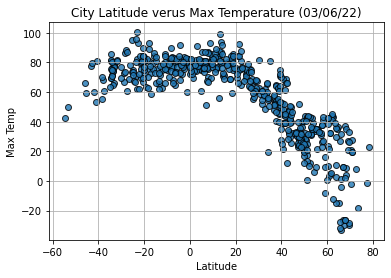

In [12]:
#Scatterplot of Lattitude versus Temperature
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Max Temp"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.1.png")  

plt.show()

Figure 2. Latitude vs. Humidity

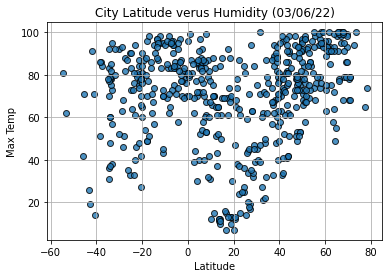

In [13]:
#Scatterplot of Lattitude versus Hudimity
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Humidity"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.2.png")  

plt.show()

Figure 3.  Latitute vs. Cloudiness


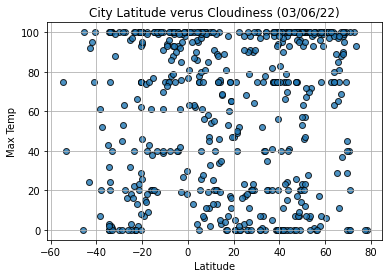

In [14]:
#Scatterplot of Lattitude versus Cloudiness
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Cloudiness"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.4.png")  

plt.show()

Latitude vs Windspeed

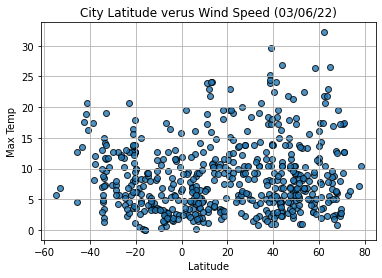

In [15]:
#Scatterplot of Lattitude versus Wind Speed
#x value is latitude, y value is max_temp
plt.scatter(clean_city_data_df["Lat"],clean_city_data_df["Wind Speed"],
             edgecolor="black", linewidth=1, marker="o",
             alpha=0.8, label="Cities")

plt.title(f"City Latitude verus Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(True)

#save figure
plt.savefig("output/Fig.4.png")  

plt.show()

Linear Regression

In [16]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates): 
    
    #Run regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()
    

In [17]:
# Create dataframes to use with the linear regression function
#northern hemisphere
northern_hem_df = clean_city_data_df.loc[(city_data_pd["Lat"] >=0)]
northern_hem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 1 to 545
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        378 non-null    object 
 1   Lat         378 non-null    float64
 2   Max Temp    378 non-null    float64
 3   Humidity    378 non-null    int64  
 4   Cloudiness  378 non-null    int64  
 5   Wind Speed  378 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 20.7+ KB


In [18]:
#southern hemisphere
southern_hem_df = clean_city_data_df.loc[(city_data_pd["Lat"] <0)]
southern_hem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 0 to 543
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        168 non-null    object 
 1   Lat         168 non-null    float64
 2   Max Temp    168 non-null    float64
 3   Humidity    168 non-null    int64  
 4   Cloudiness  168 non-null    int64  
 5   Wind Speed  168 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 9.2+ KB


Max Temp Linear Regression


The r-value is: 0.7559202190494497


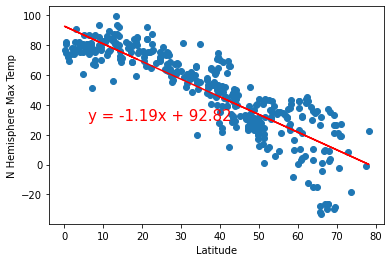

In [19]:
#Northern Hemisphere (y is the dependent variable/Max Temp)
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Max Temp"]

plot_linear_regression(x_values, y_values, "N Hemisphere Max Temp", (6,30))

The r-value is: 0.09798520625343275


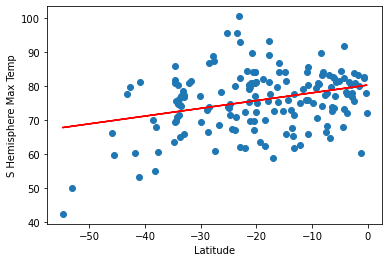

In [20]:
#Southern Hemisphere (y is the dependent variable/Max Temp)
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"]

plot_linear_regression(x_values, y_values, "S Hemisphere Max Temp", (6,30))

Humidity(%) Linear Regression

The r-value is: 0.16461731104825264


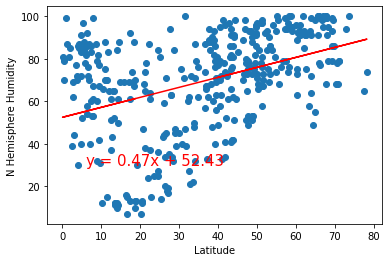

In [21]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Humidity"]

plot_linear_regression(x_values, y_values, "N Hemisphere Humidity", (6,30))

The r-value is: 0.1266679361649758


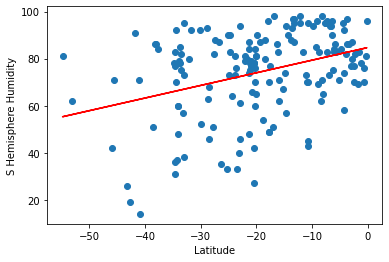

In [22]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"]

plot_linear_regression(x_values, y_values, "S Hemisphere Humidity", (6,30))

Cloudiness Linear Regression

The r-value is: 0.011137354570290317


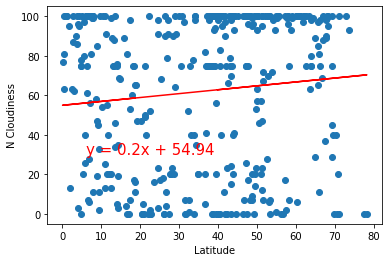

In [23]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "N Cloudiness", (6,30))

The r-value is: 0.0843875990235685


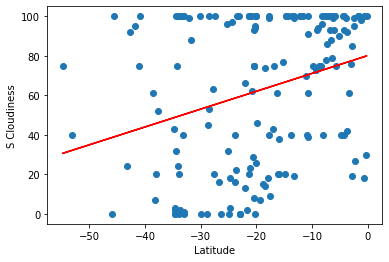

In [24]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "S Cloudiness", (6,30))

Wind Speed Linear Regression

The r-value is: 0.00561274177090105


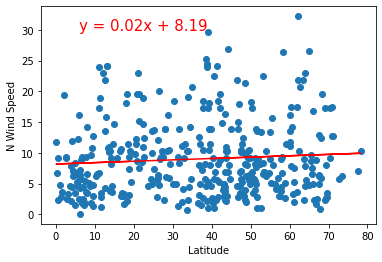

In [25]:
#Northern Hemisphere
x_values = northern_hem_df["Lat"]
y_values = northern_hem_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "N Wind Speed", (6,30))

The r-value is: 0.10148509680672126


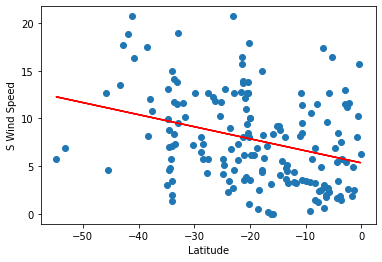

In [26]:
#Southern Hemisphere
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "S Wind Speed", (6,30))

Analysis: Based on the linear regressions of the latitude and max temperature, humidity, cloudiness, and wind speed, there is little to no correlation between latitude and the other factors. The one exception is the relation between maximum temperature and latitude in the northern hemisphere, which had an r-value of 0.75. The r-values for the remaining regressions was less than 0.2. 